In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from scipy.stats import zscore, boxcox

import statsmodels.formula.api as smf

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#storing the file path/ url path in a variable
df0 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
#read top 5 rows of the data
df0.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df0.shape[0], df0.shape[1]))

Rows: 32560 Columns: 15


### there are 32560 rows and 15 columns

In [5]:
#checking shape & datatypes of the columns in data...
print(df0.shape)
print(' ')
print(df0.dtypes)

(32560, 15)
 
Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object


### all data are of two types int and object, we will handle this later

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### there is no null values in our dataset

In [7]:
df0.duplicated().sum()

24

### we will handle it later

In [8]:
# Statistical summary
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


### age is ranges between 17 to 90
### capital gain and cpital loss has minimum 0 value

In [9]:
#total missing values
df0.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
# % of missing values
df0.isnull().sum()*100/df0.shape[0]

Age               0.0
Workclass         0.0
Fnlwgt            0.0
Education         0.0
Education_num     0.0
Marital_status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital_gain      0.0
Capital_loss      0.0
Hours_per_week    0.0
Native_country    0.0
Income            0.0
dtype: float64

In [11]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

### caoital gain and capital loss has 29849 and 31041 of 0 values respectively in the dataset

In [16]:
# Checking the counts of label categories
income = df0['Income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object

### less than 50k income is about 76%  and more than 50k is about 24%

In [17]:
columns = df0.columns.tolist()
columns_renamed = [column.strip().replace(" ", "_").lower() for column in columns]
df0.columns = columns_renamed
df0.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

# visualization

In [33]:
df1=df0.copy()

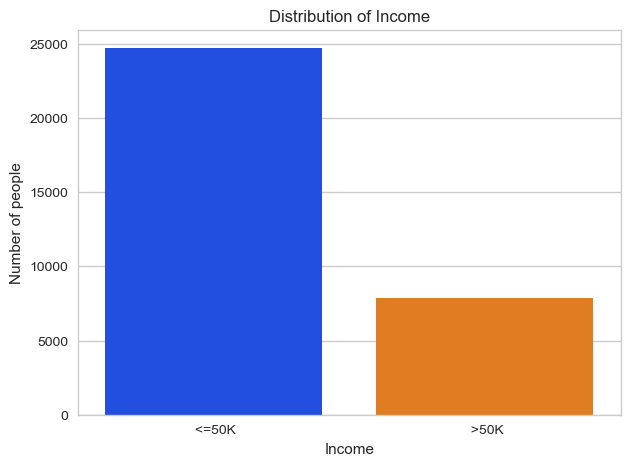

In [34]:
# Creating a barplot for 'Income'
income = df1['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

### more people earn less than 50k

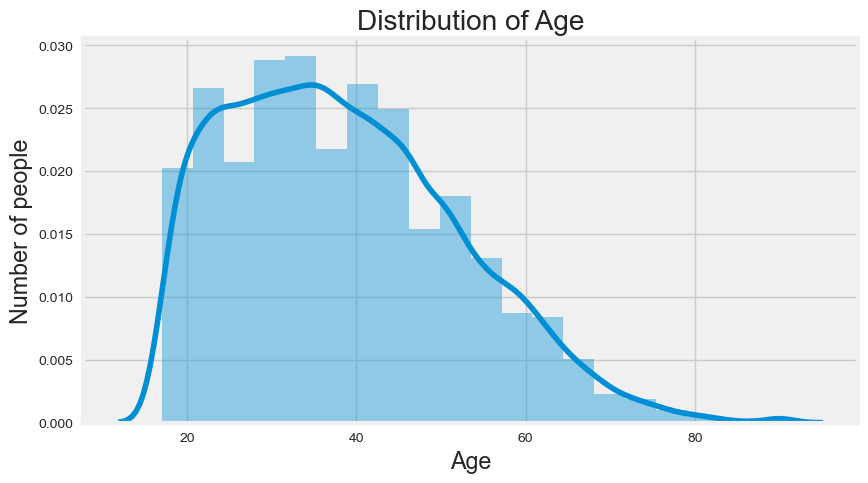

In [35]:
# Creating a distribution plot for 'Age'
age = df1['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df1['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

### people age between 20 to 40 are most in this dataset

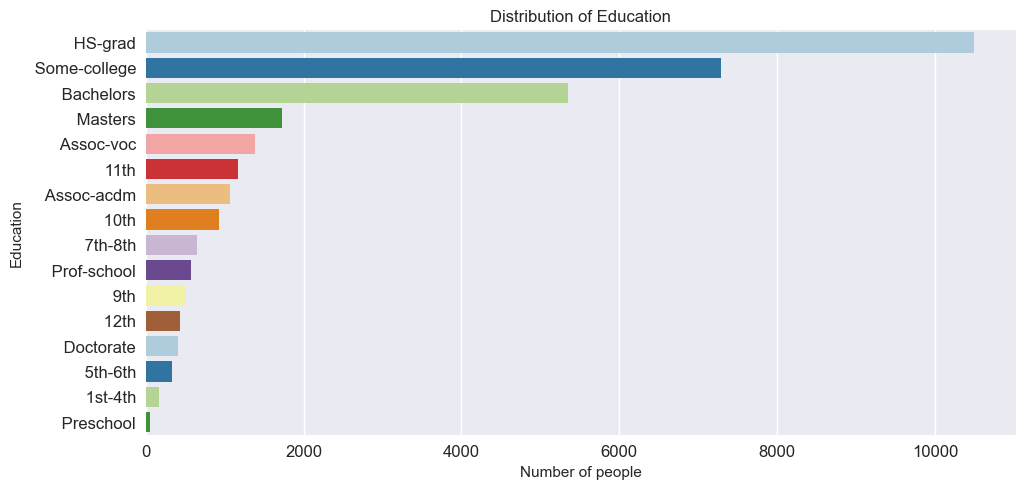

In [36]:
# Creating a barplot for 'Education'
edu = df1['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.tick_params(labelsize=12)
plt.show()

### HS-grad education has highest number of people

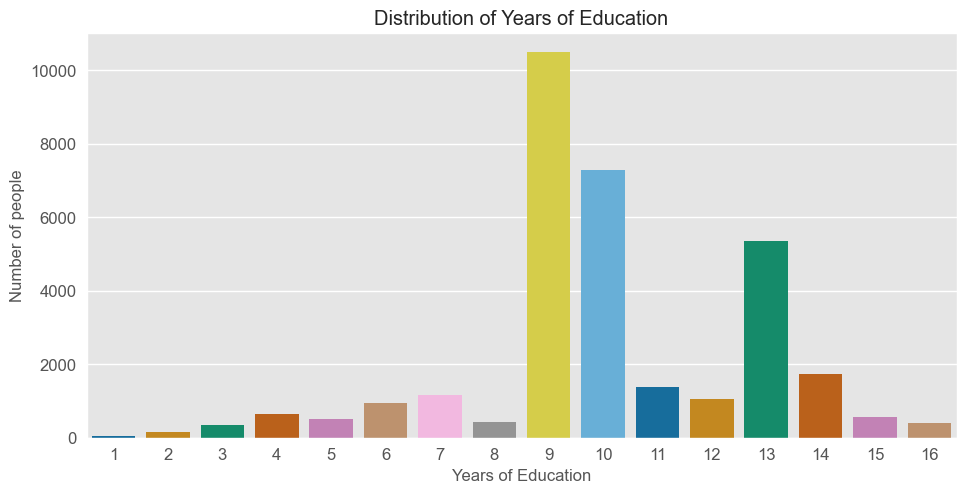

In [37]:
# Creating a barplot for 'Years of Education'
edu_num = df1['education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

### people invest maximum 9 years in their education 

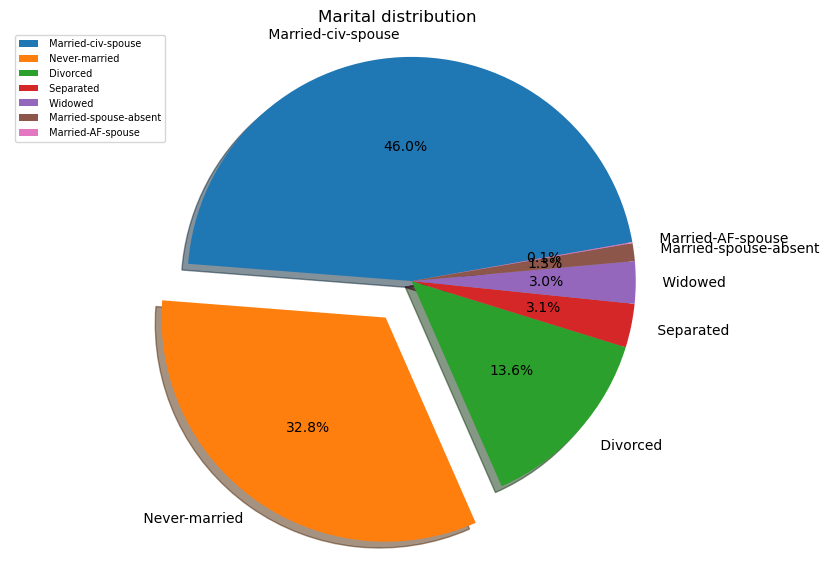

In [38]:
# Creating a pie chart for 'Marital status'
marital = df1['marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


### married-civ-spouse has highest number people and never-married has second highest according to their marital status  

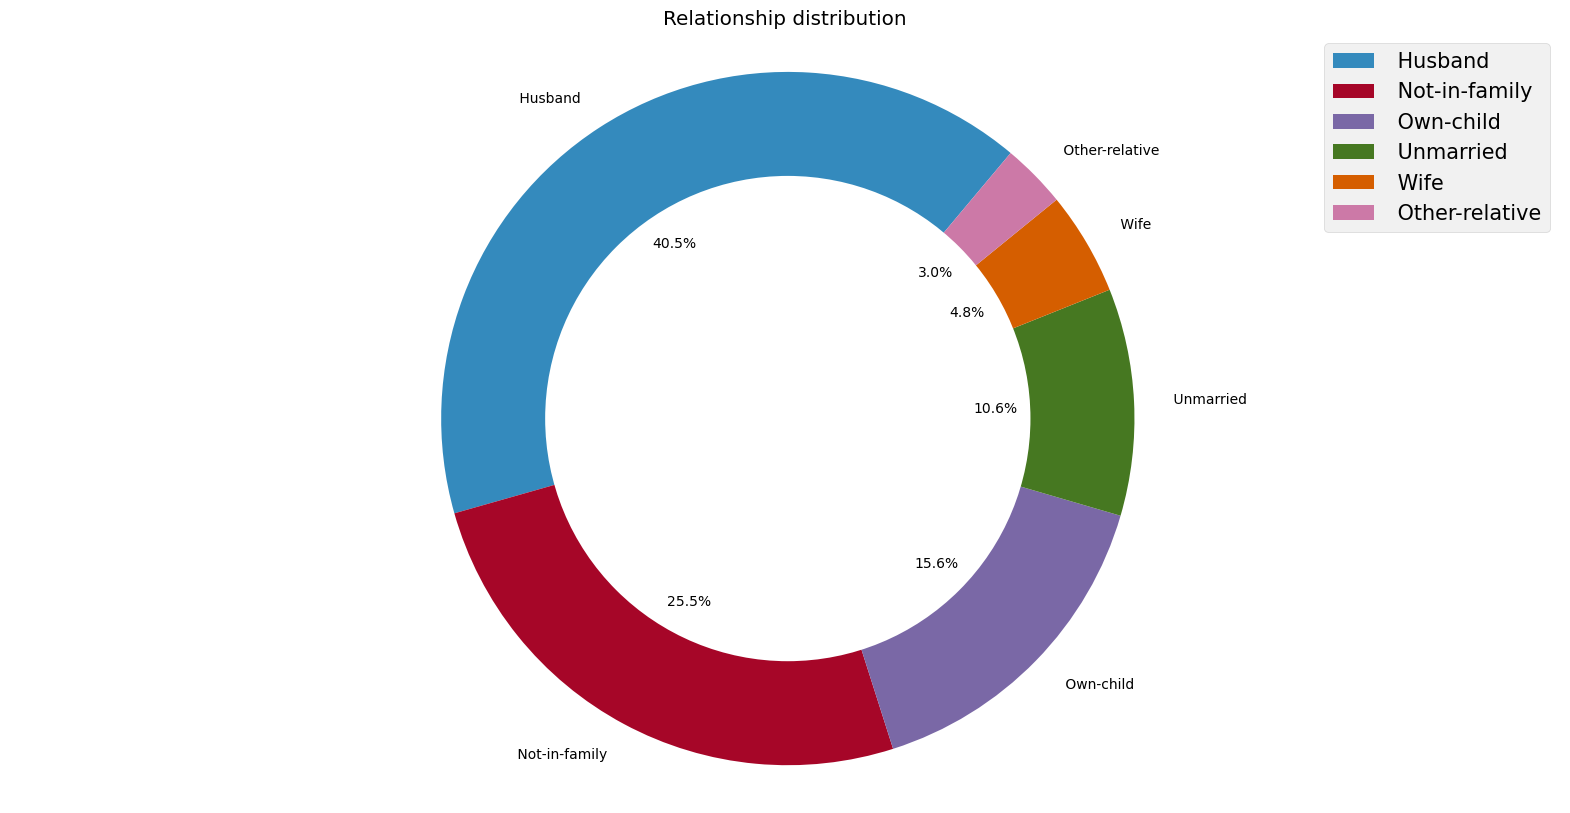

In [39]:
# Creating a donut chart for 'relationship'
relation = df1['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution')
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

### in realtionship data most are husband (40%)

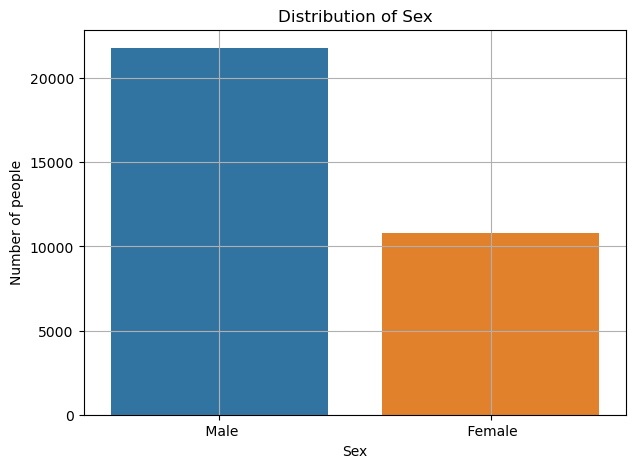

In [40]:
# Creating a barplot for 'Sex'
sex = df1['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

### male are more than female

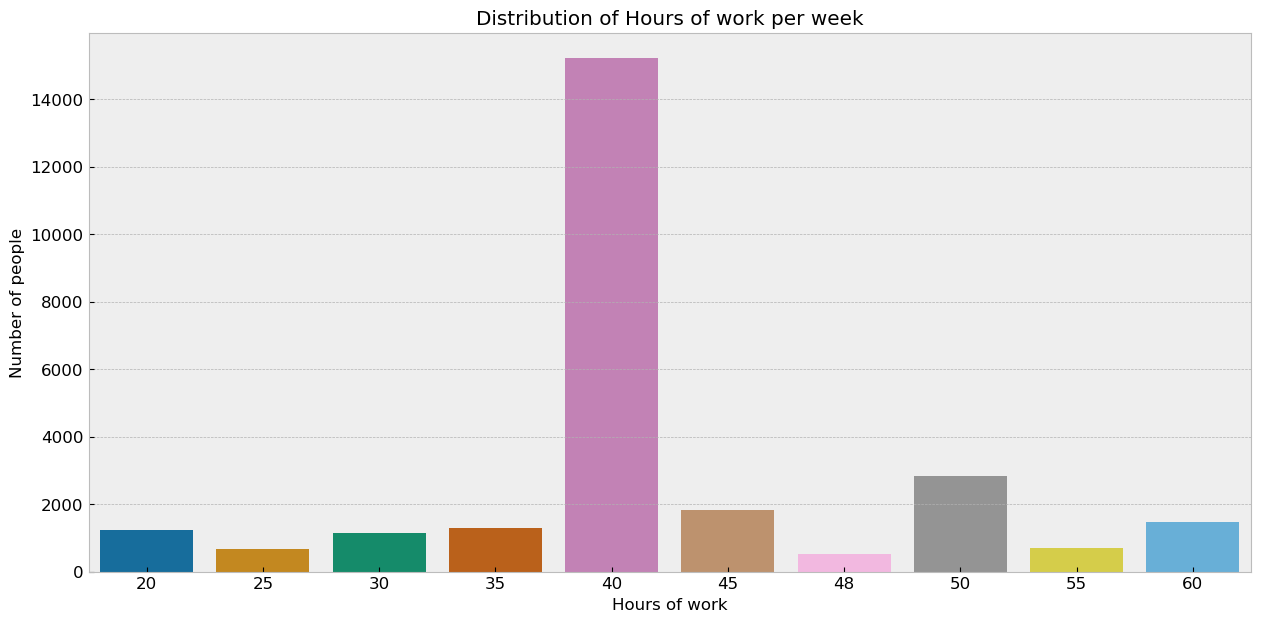

In [42]:
# Creating a barplot for 'Hours per week'
hours = df1['hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week')
plt.xlabel('Hours of work')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

### most people work 40 hours

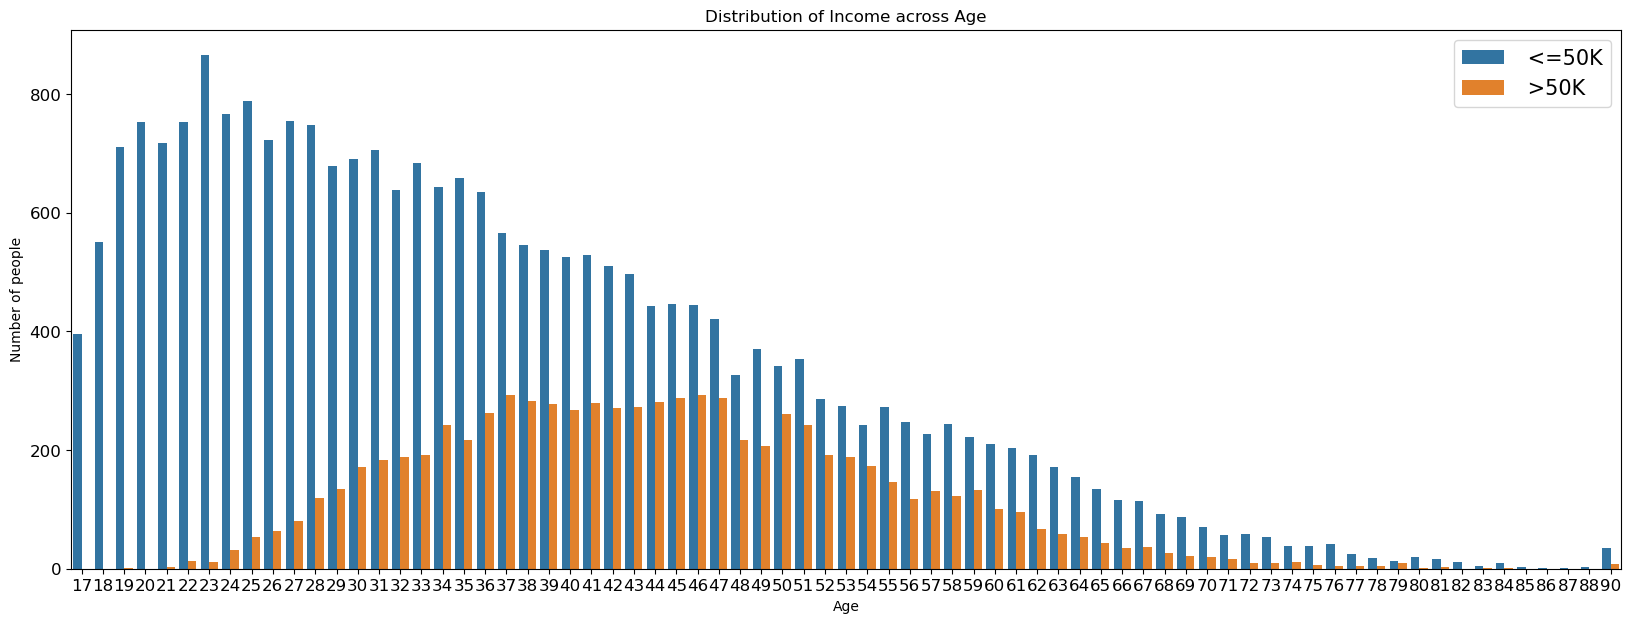

In [43]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df1['age'], hue=df1['income'])
plt.title('Distribution of Income across Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### most earned people are gouped between age 19 to 36

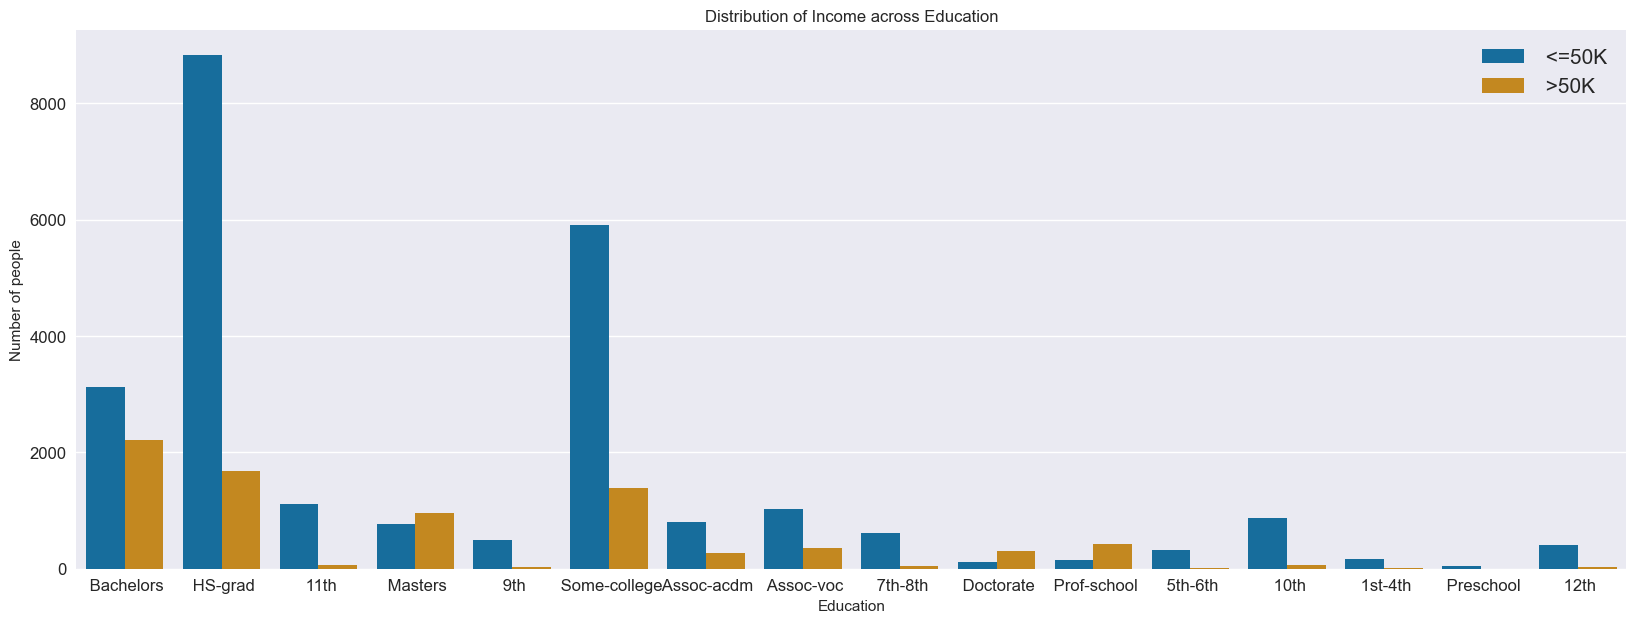

In [44]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df1['education'],
              hue=df1['income'], palette='colorblind')
plt.title('Distribution of Income across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### people who earned more than 50k are mostly belong from Bachelors,Hs-grad, masters and some-college and who earned less than 50k they are also mostly belong to these group

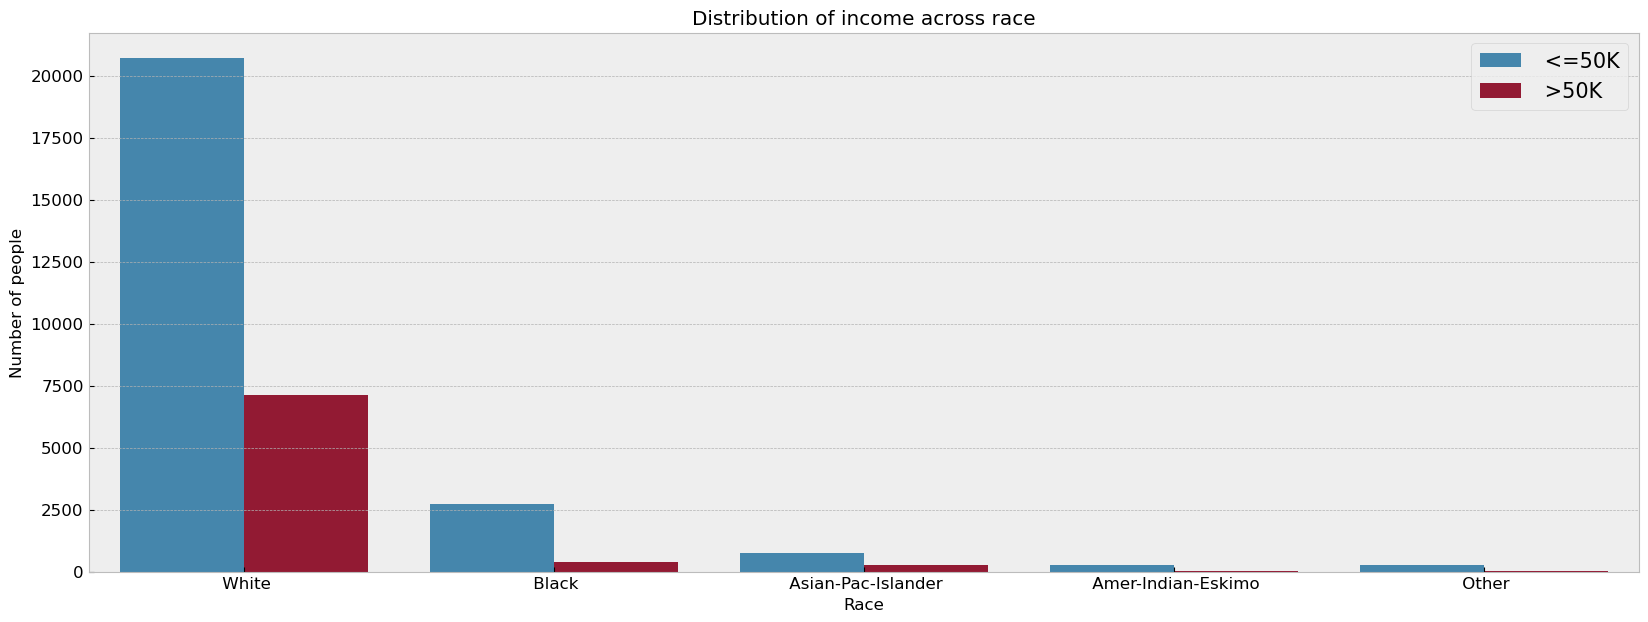

In [48]:
# Creating a countplot of income across race
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(df1['race'], hue=df1['income'])
plt.title('Distribution of income across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### white people are more in number and that's why earned most in both case; <=50k and >50k

## chnaging target data into numerical data through label encoder

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
df1['income'] = le.fit_transform(df1['income'])

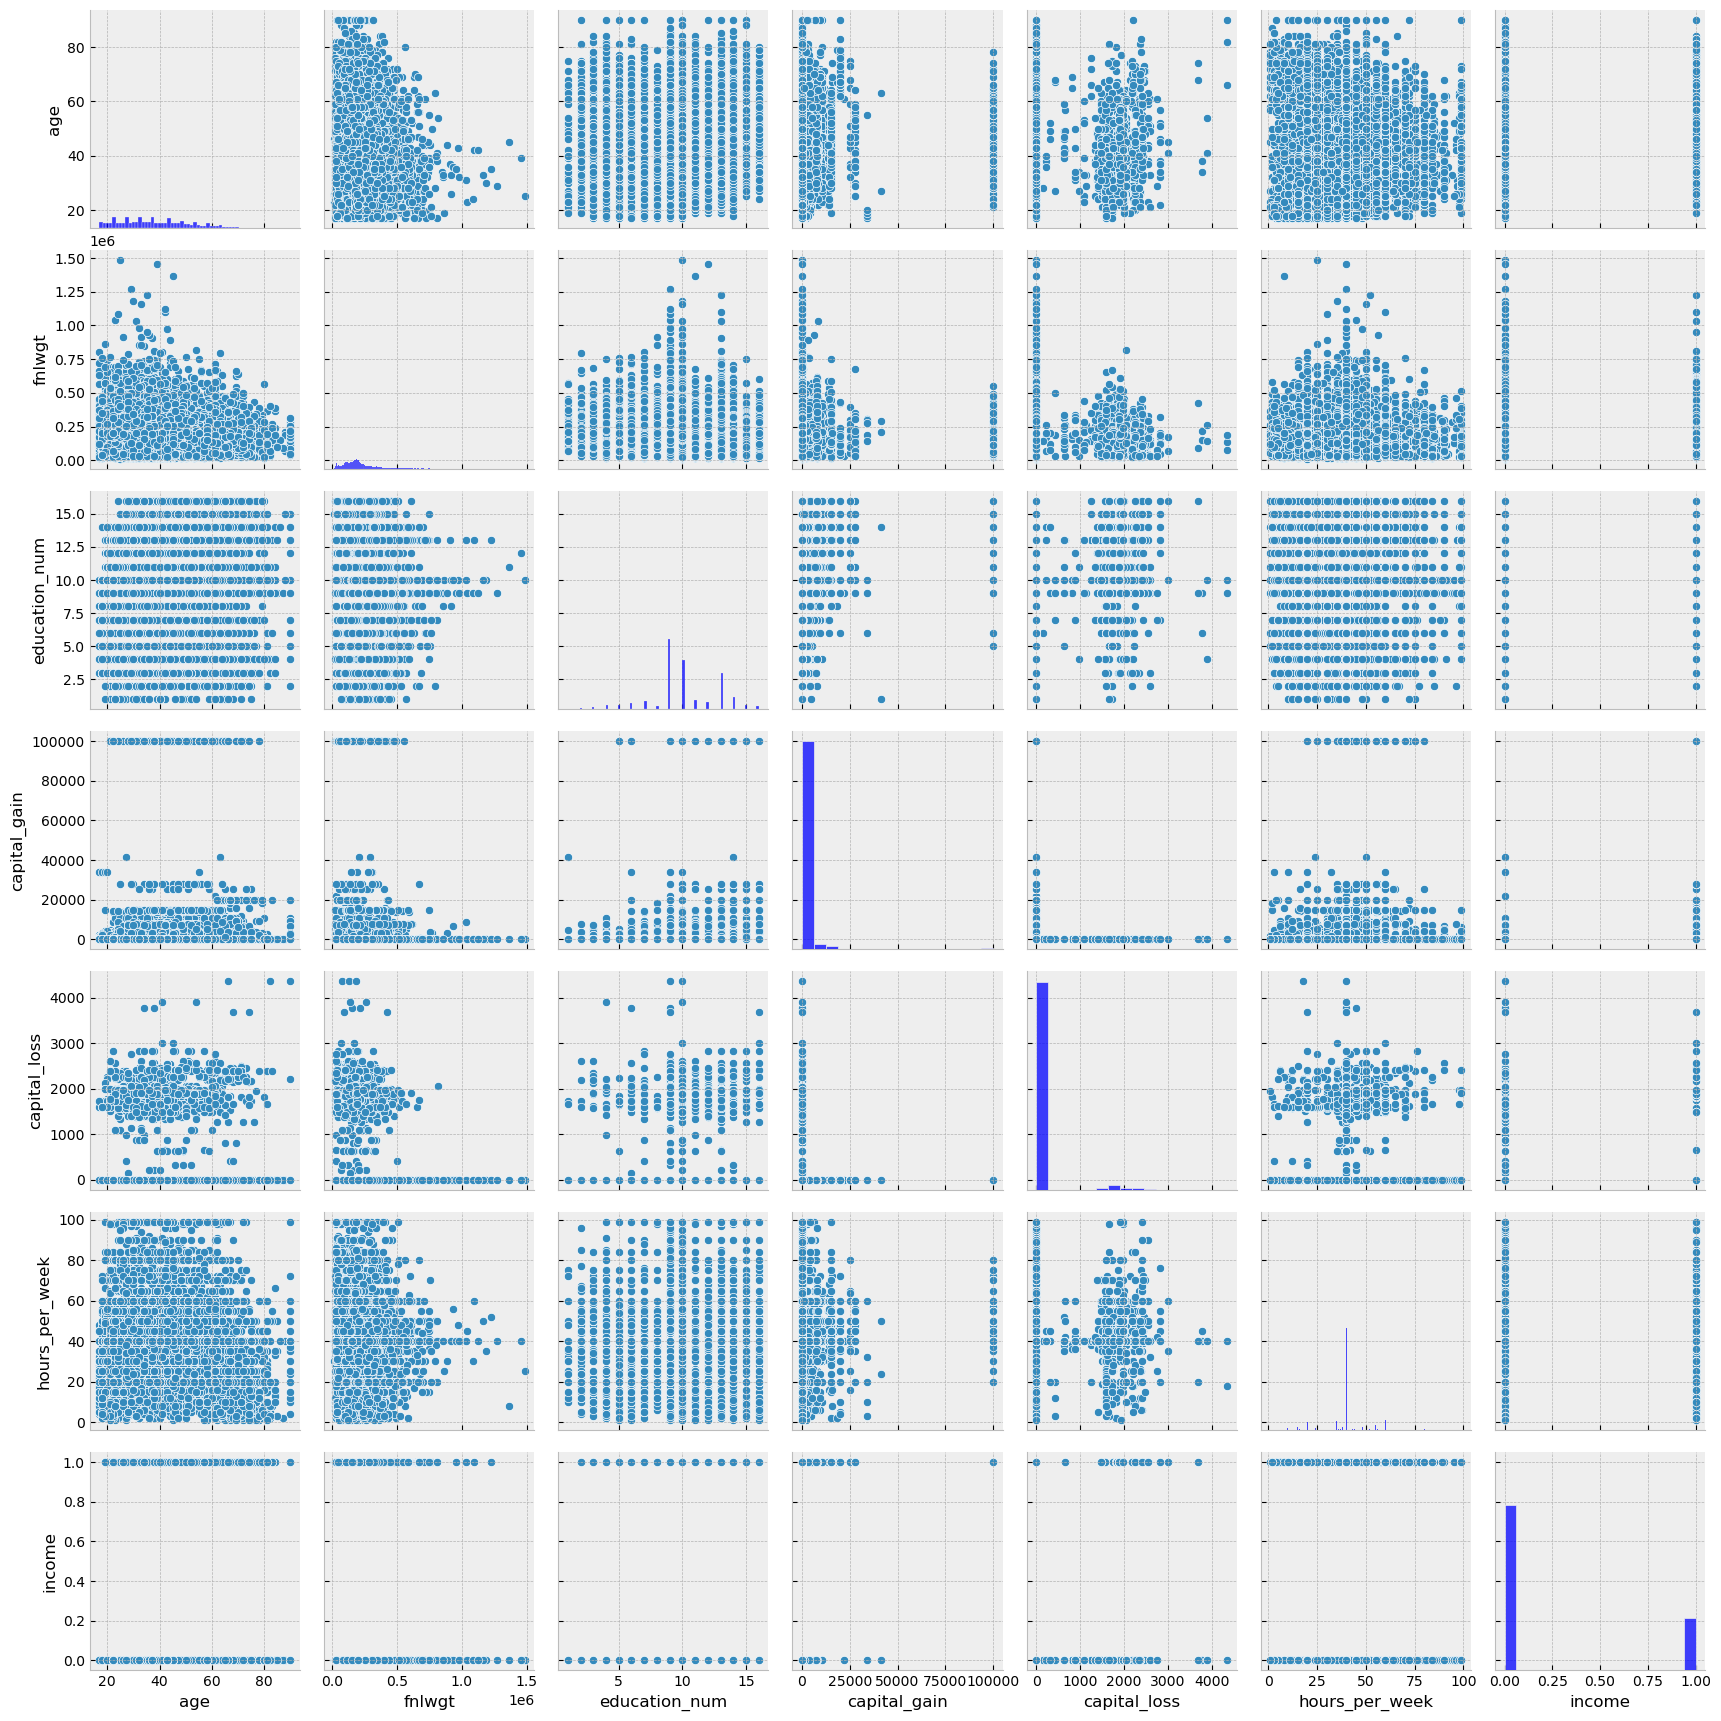

In [51]:
 #Creating a pairplot of dataset
sns.pairplot(df1)
plt.show()

<AxesSubplot:>

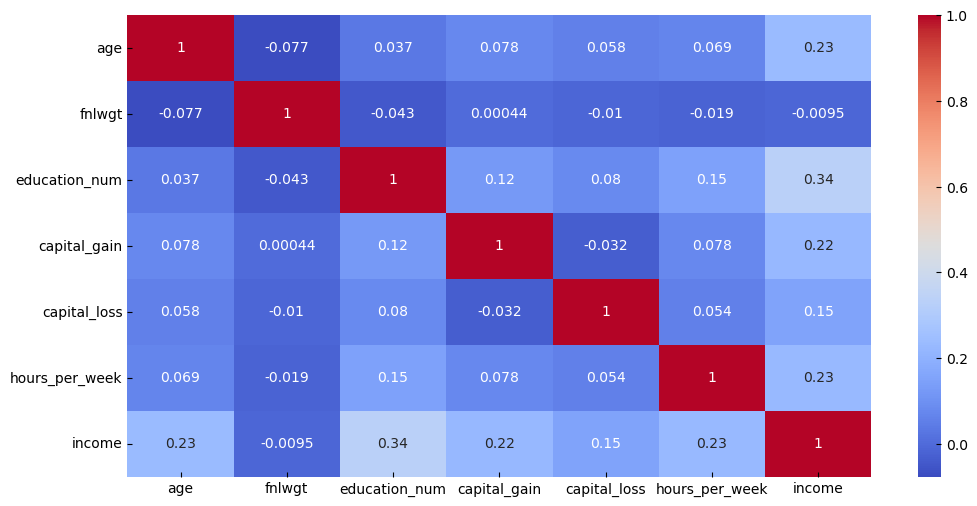

In [52]:
corr_df = df1.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

In [64]:
df2=df1.copy()

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


### changing all the categorical data into numerical data by labelencoder

In [68]:
columns=['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
for x in columns:
    df2[x]= le.fit_transform(df2[x])
    
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [87]:
df3=df2.copy()

### checking skewness

In [82]:
from scipy.stats import skew
from scipy import stats

age
0.5587118988154982


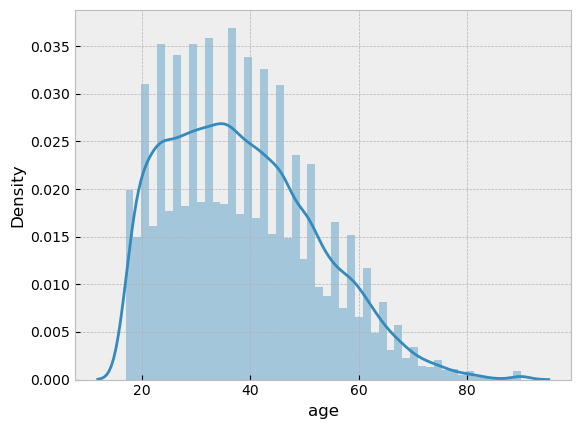

workclass
-0.7522454408295943


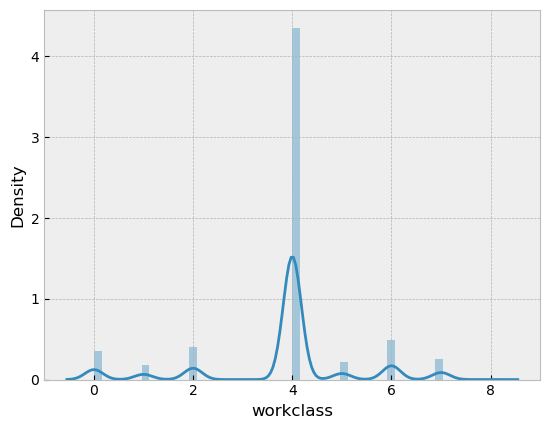

fnlwgt
1.4469055818253151


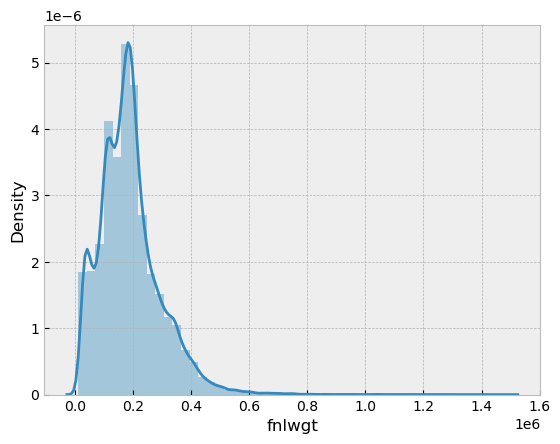

education
-0.9340196537739126


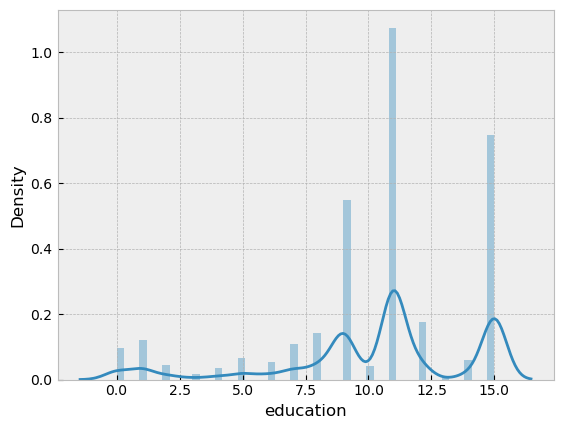

education_num
-0.31161553498633193


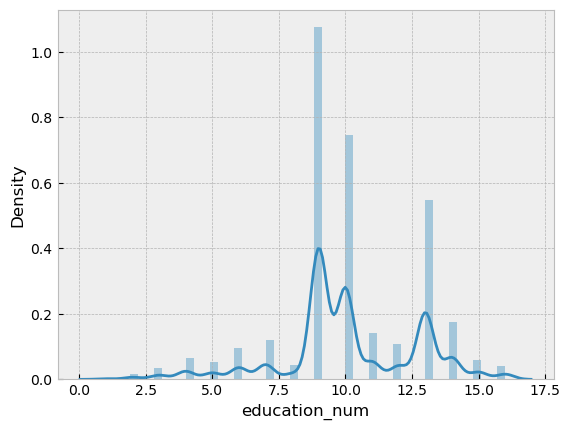

marital_status
-0.013446962916864369


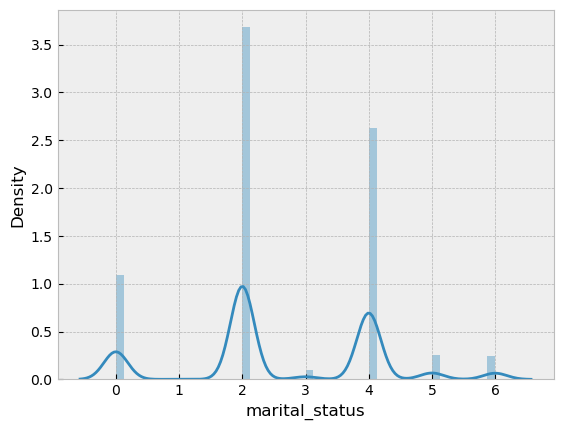

occupation
0.11453431348441435


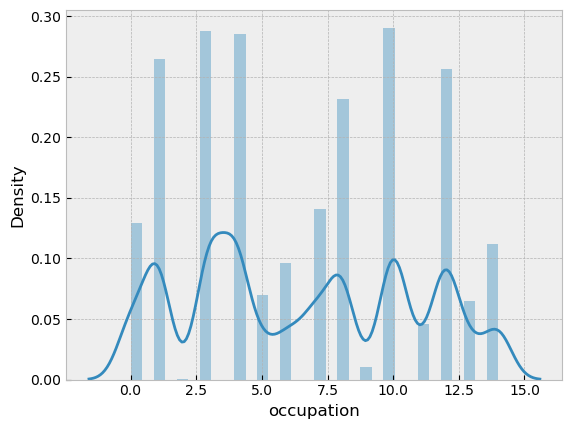

relationship
0.7867473090814343


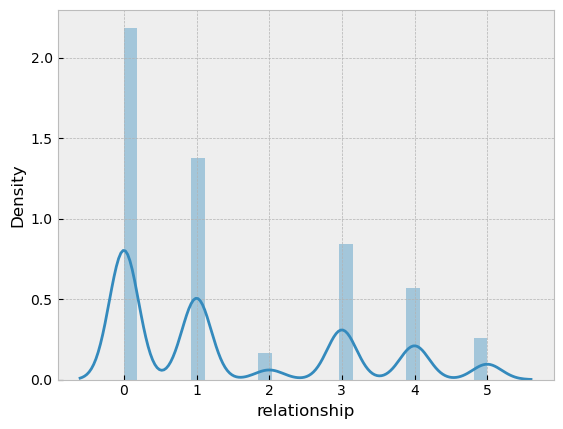

race
-2.4352196663495116


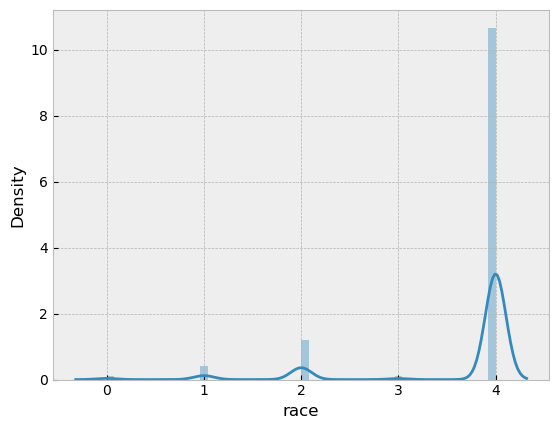

sex
-0.7192106431922183


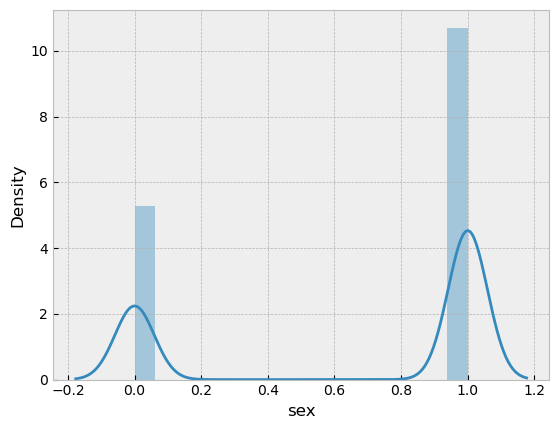

capital_gain
11.953139157554617


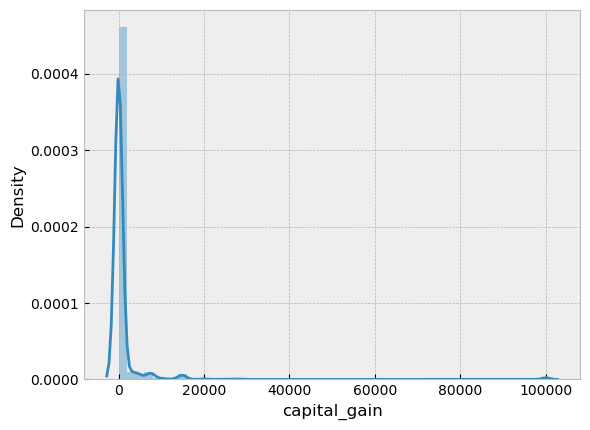

capital_loss
4.594337190555792


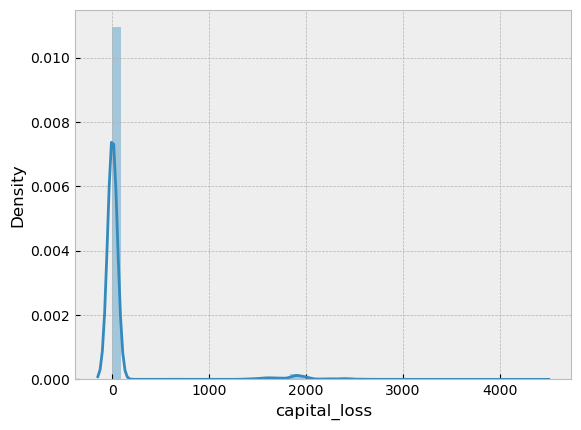

hours_per_week
0.2276253044722967


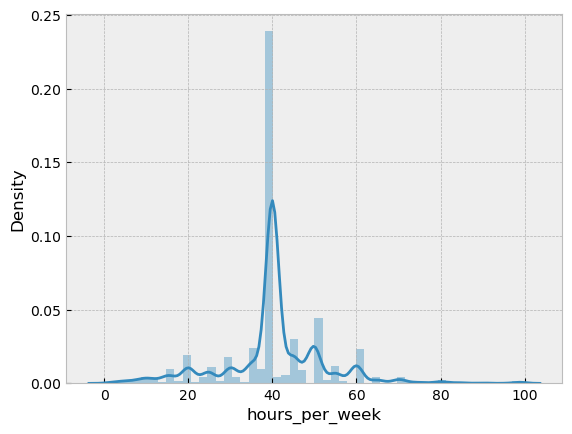

native_country
-3.658066813887923


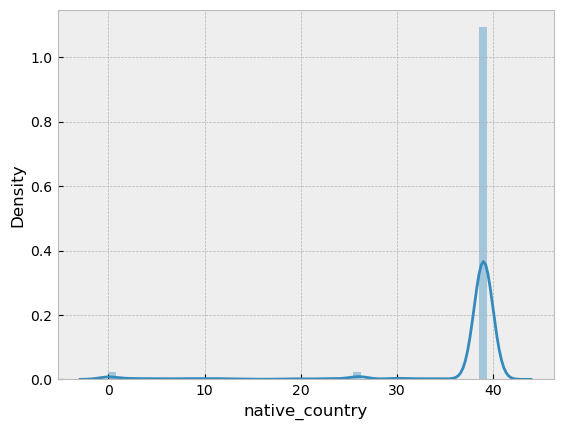

income
1.212327081863191


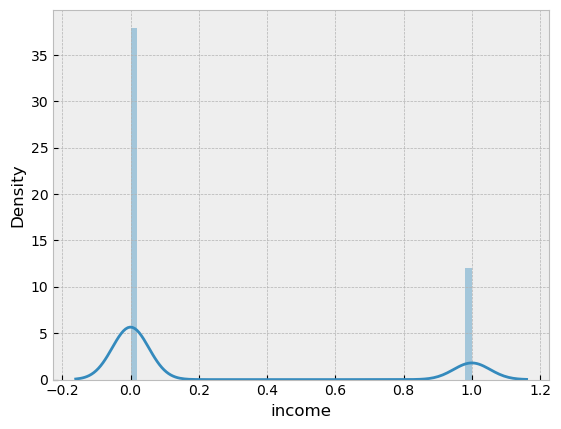

In [83]:
for col in df3:
    print(col)
    print(skew(df3[col]))
    
    
    plt.figure()
    sns.distplot(df3[col])
    plt.show()

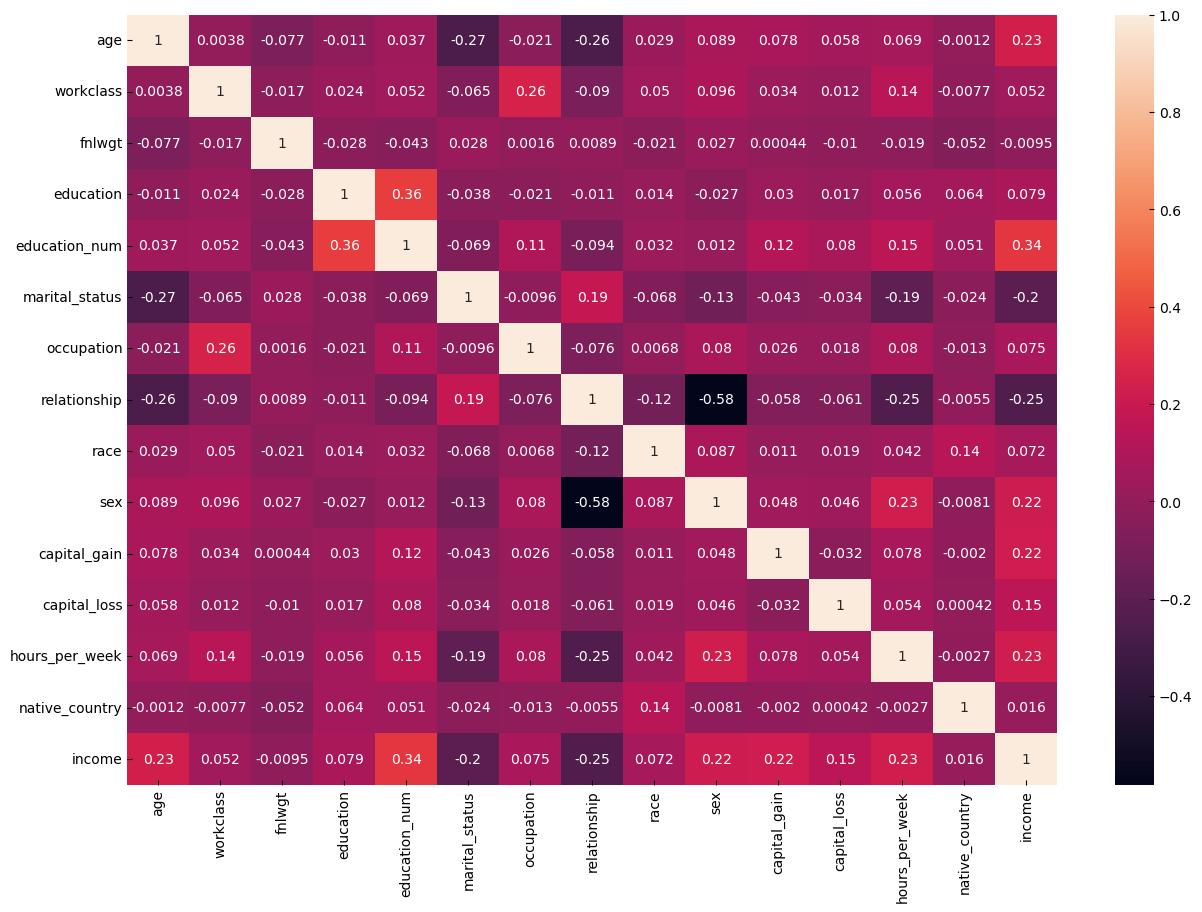

In [73]:
plt.figure(figsize = (15,10))
sns.heatmap(df3.corr(),annot=True)
plt.show()

In [84]:
df3.skew()

age                0.558738
workclass         -0.752280
fnlwgt             1.446972
education         -0.934063
education_num     -0.311630
marital_status    -0.013448
occupation         0.114540
relationship       0.786784
race              -2.435332
sex               -0.719244
capital_gain      11.953690
capital_loss       4.594549
hours_per_week     0.227636
native_country    -3.658235
income             1.212383
dtype: float64

### removing the skewed data

In [88]:
df3[['fnlwgt','relationship','capital_gain','capital_loss','income']]=np.sqrt(df3[['fnlwgt','relationship','capital_gain','capital_loss','income']])
df3.skew()

age               0.558738
workclass        -0.752280
fnlwgt            0.189066
education        -0.934063
education_num    -0.311630
marital_status   -0.013448
occupation        0.114540
relationship      0.150789
race             -2.435332
sex              -0.719244
capital_gain      5.894949
capital_loss      4.376279
hours_per_week    0.227636
native_country   -3.658235
income            1.212383
dtype: float64

In [143]:
df4=df3.copy()

### checking outliers

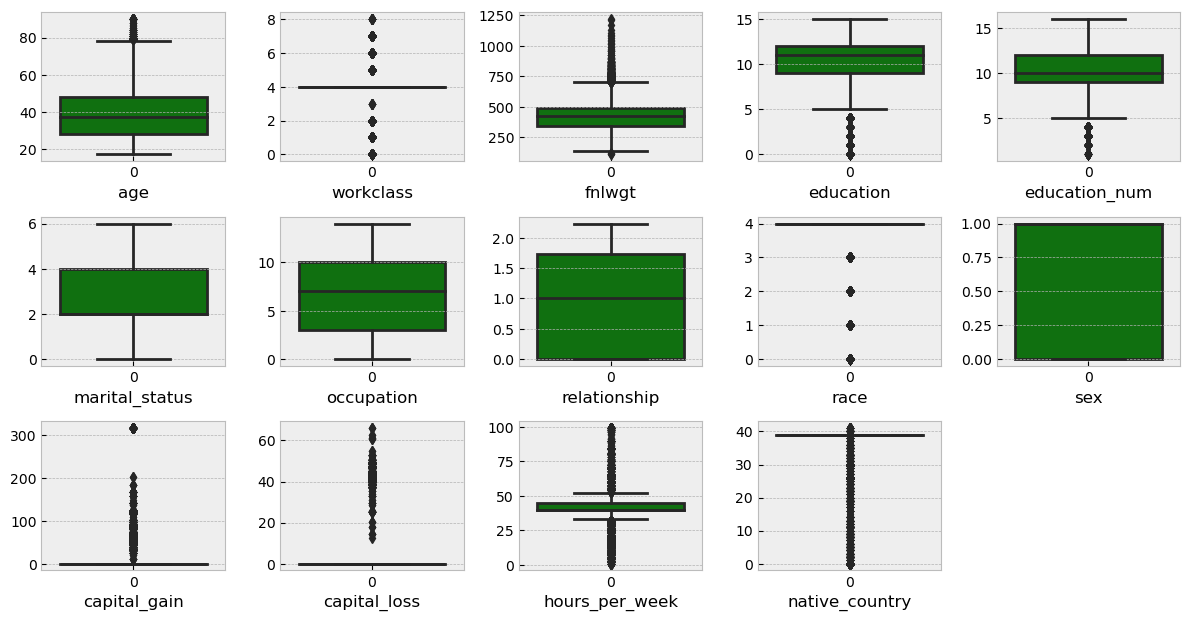

In [144]:
collist=df4[['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']].columns.values

plt.figure(figsize=(12,10))
for i in range(0,14):
    plt.subplot(5,5,i+1)
    sns.boxplot(data=df4[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

### removing the outliers

In [145]:
#1st quantile 
q1= df4.quantile(0.25)
#3rd quantile
q3=df4.quantile(0.75)
#IQR
iqr=q3-q1

In [146]:
Age=(q3.age + (1.5*iqr.age))
print(Age)   

index=np.where(df4['age']> Age)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

78.0
(32417, 15)


,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,50,6,288.636450,9,13,2,4,0.000000,4,1,0.000000,0.0,13,39,0.0
1,1,38,4,464.377002,11,9,0,6,1.000000,4,1,0.000000,0.0,40,39,0.0
2,2,53,4,484.480134,1,7,2,6,0.000000,2,1,0.000000,0.0,40,39,0.0
3,3,28,4,581.729318,9,13,2,10,2.236068,2,0,0.000000,0.0,40,5,0.0
4,4,37,4,533.462276,12,14,2,4,2.236068,4,0,0.000000,0.0,40,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32412,32555,27,4,507.249446,7,12,2,13,2.236068,4,0,0.000000,0.0,38,39,0.0
32413,32556,40,4,392.904569,11,9,2,7,0.000000,4,1,0.000000,0.0,40,39,1.0
32414,32557,58,4,389.756334,11,9,6,1,2.000000,4,0,0.000000,0.0,40,39,0.0
32415,32558,22,4,448.876375,11,9,4,1,1.732051,4,1,0.000000,0.0,20,39,0.0


In [147]:
Fnlwgt=(q3.fnlwgt + (1.5*iqr.fnlwgt))
print(Fnlwgt)   

index=np.where(df4['fnlwgt']> Fnlwgt)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

702.307175438676
(32012, 15)


,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,50,6,288.636450,9,13,2,4,0.000000,4,1,0.000000,0.0,13,39,0.0
1,1,38,4,464.377002,11,9,0,6,1.000000,4,1,0.000000,0.0,40,39,0.0
2,2,53,4,484.480134,1,7,2,6,0.000000,2,1,0.000000,0.0,40,39,0.0
3,3,28,4,581.729318,9,13,2,10,2.236068,2,0,0.000000,0.0,40,5,0.0
4,4,37,4,533.462276,12,14,2,4,2.236068,4,0,0.000000,0.0,40,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32007,32555,27,4,507.249446,7,12,2,13,2.236068,4,0,0.000000,0.0,38,39,0.0
32008,32556,40,4,392.904569,11,9,2,7,0.000000,4,1,0.000000,0.0,40,39,1.0
32009,32557,58,4,389.756334,11,9,6,1,2.000000,4,0,0.000000,0.0,40,39,0.0
32010,32558,22,4,448.876375,11,9,4,1,1.732051,4,1,0.000000,0.0,20,39,0.0


In [148]:
Education=(q1.education - (1.5*iqr.education))
print(Education)   

index=np.where(df4['education'] < Education)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

4.5
(29042, 15)


,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,50,6,288.636450,9,13,2,4,0.000000,4,1,0.000000,0.0,13,39,0.0
1,1,38,4,464.377002,11,9,0,6,1.000000,4,1,0.000000,0.0,40,39,0.0
2,3,28,4,581.729318,9,13,2,10,2.236068,2,0,0.000000,0.0,40,5,0.0
3,4,37,4,533.462276,12,14,2,4,2.236068,4,0,0.000000,0.0,40,39,0.0
4,5,49,4,400.233682,6,5,3,8,1.000000,2,0,0.000000,0.0,16,23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29037,32555,27,4,507.249446,7,12,2,13,2.236068,4,0,0.000000,0.0,38,39,0.0
29038,32556,40,4,392.904569,11,9,2,7,0.000000,4,1,0.000000,0.0,40,39,1.0
29039,32557,58,4,389.756334,11,9,6,1,2.000000,4,0,0.000000,0.0,40,39,0.0
29040,32558,22,4,448.876375,11,9,4,1,1.732051,4,1,0.000000,0.0,20,39,0.0


In [149]:
Education_num=(q1.education_num - (1.5*iqr.education_num))
print(Education_num)   

index=np.where(df4['education_num'] < Education_num)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

4.5
(28366, 15)


,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,50,6,288.636450,9,13,2,4,0.000000,4,1,0.000000,0.0,13,39,0.0
1,1,38,4,464.377002,11,9,0,6,1.000000,4,1,0.000000,0.0,40,39,0.0
2,3,28,4,581.729318,9,13,2,10,2.236068,2,0,0.000000,0.0,40,5,0.0
3,4,37,4,533.462276,12,14,2,4,2.236068,4,0,0.000000,0.0,40,39,0.0
4,5,49,4,400.233682,6,5,3,8,1.000000,2,0,0.000000,0.0,16,23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28361,32555,27,4,507.249446,7,12,2,13,2.236068,4,0,0.000000,0.0,38,39,0.0
28362,32556,40,4,392.904569,11,9,2,7,0.000000,4,1,0.000000,0.0,40,39,1.0
28363,32557,58,4,389.756334,11,9,6,1,2.000000,4,0,0.000000,0.0,40,39,0.0
28364,32558,22,4,448.876375,11,9,4,1,1.732051,4,1,0.000000,0.0,20,39,0.0


In [150]:
Hours_per_week=(q1.hours_per_week - (1.5*iqr.hours_per_week))
print(Hours_per_week)   

index=np.where(df4['hours_per_week'] < Hours_per_week)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

32.5
(24046, 15)


,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,38,4,464.377002,11,9,0,6,1.000000,4,1,0.000000,0.0,40,39,0.0
1,3,28,4,581.729318,9,13,2,10,2.236068,2,0,0.000000,0.0,40,5,0.0
2,4,37,4,533.462276,12,14,2,4,2.236068,4,0,0.000000,0.0,40,39,0.0
3,6,52,6,457.866793,11,9,2,4,0.000000,4,1,0.000000,0.0,45,39,1.0
4,7,31,4,213.964950,12,14,4,10,1.000000,4,0,118.676030,0.0,50,39,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24041,32554,22,4,556.912920,15,10,4,11,1.000000,4,1,0.000000,0.0,40,39,0.0
24042,32555,27,4,507.249446,7,12,2,13,2.236068,4,0,0.000000,0.0,38,39,0.0
24043,32556,40,4,392.904569,11,9,2,7,0.000000,4,1,0.000000,0.0,40,39,1.0
24044,32557,58,4,389.756334,11,9,6,1,2.000000,4,0,0.000000,0.0,40,39,0.0


In [151]:
Hours_per_week=(q3.hours_per_week + (1.5*iqr.hours_per_week))
print(Hours_per_week)   

index=np.where(df4['hours_per_week'] > Hours_per_week)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

52.5
(20854, 15)


,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,38,4,464.377002,11,9,0,6,1.000000,4,1,0.000000,0.0,40,39,0.0
1,3,28,4,581.729318,9,13,2,10,2.236068,2,0,0.000000,0.0,40,5,0.0
2,4,37,4,533.462276,12,14,2,4,2.236068,4,0,0.000000,0.0,40,39,0.0
3,6,52,6,457.866793,11,9,2,4,0.000000,4,1,0.000000,0.0,45,39,1.0
4,7,31,4,213.964950,12,14,4,10,1.000000,4,0,118.676030,0.0,50,39,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20849,32554,22,4,556.912920,15,10,4,11,1.000000,4,1,0.000000,0.0,40,39,0.0
20850,32555,27,4,507.249446,7,12,2,13,2.236068,4,0,0.000000,0.0,38,39,0.0
20851,32556,40,4,392.904569,11,9,2,7,0.000000,4,1,0.000000,0.0,40,39,1.0
20852,32557,58,4,389.756334,11,9,6,1,2.000000,4,0,0.000000,0.0,40,39,0.0


In [219]:
df5=df4.copy()

## spliting target and features 

In [220]:
X=df5.drop('income',axis=1)
X

y=df5['income']
y

1        0.0
3        0.0
4        0.0
6        1.0
7        1.0
        ... 
32554    0.0
32555    0.0
32556    1.0
32557    0.0
32559    1.0
Name: income, Length: 20854, dtype: float64

In [221]:
#data scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [222]:
#Splitting data for train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [223]:
#shape of the data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(20854, 14)
(15640, 14)
(5214, 14)


## Model preparation

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

## 1. Logistic Regression

In [225]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

         0.0       0.83      0.93      0.87      3725
         1.0       0.74      0.52      0.61      1489

    accuracy                           0.81      5214
   macro avg       0.78      0.72      0.74      5214
weighted avg       0.80      0.81      0.80      5214



In [226]:
cross_val_score(model1,X,y,cv=10).mean()

0.8085748084178871

## 2. Random forest classifier

In [229]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      3725
         1.0       0.73      0.63      0.68      1489

    accuracy                           0.83      5214
   macro avg       0.80      0.77      0.78      5214
weighted avg       0.82      0.83      0.83      5214



In [230]:
cross_val_score(model2,X,y,cv=5).mean()

0.8337491426182957

## 3. Gradient Boosting Classifier

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      3725
         1.0       0.80      0.62      0.70      1489

    accuracy                           0.85      5214
   macro avg       0.83      0.78      0.80      5214
weighted avg       0.84      0.85      0.84      5214



In [183]:
cross_val_score(model3,X,y,cv=5).mean()

0.8473197198654407

## 4. Decision Tree classifier

In [184]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      3725
         1.0       0.62      0.64      0.63      1489

    accuracy                           0.79      5214
   macro avg       0.74      0.74      0.74      5214
weighted avg       0.79      0.79      0.79      5214



In [185]:
cross_val_score(model4,X,y,cv=5).mean()

0.7888177417787658

## 5. Ada Boost classifier

In [190]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      3725
         1.0       0.76      0.61      0.68      1489

    accuracy                           0.84      5214
   macro avg       0.81      0.77      0.78      5214
weighted avg       0.83      0.84      0.83      5214



In [191]:
cross_val_score(model4,X,y,cv=10).mean()

0.7902566154171582

## 6. KNeighbors Classifier

In [192]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      3725
         1.0       0.66      0.62      0.64      1489

    accuracy                           0.80      5214
   macro avg       0.75      0.74      0.75      5214
weighted avg       0.79      0.80      0.80      5214



In [193]:
cross_val_score(model6,X,y,cv=10).mean()

0.8096295044501313

## Model3 Gradient Boosting Classifier has highest accuracy with lowest difference to cross_val_score. so we tune this model

## Hyperparameter Tuning

In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
param_grid={"n_estimators":[5,50,250],
            "max_depth":[1,3,5,7],
            "learning_rate":[0.01,0.1,1,10]
           }

In [209]:
grid_search=GridSearchCV(estimator=model3, param_grid=param_grid,n_jobs=-1)

In [210]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [5, 50, 250]})

In [211]:
best_param =grid_search.best_params_
print(best_param)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}


In [212]:
grid_search.best_score_

0.8530690537084398

In [213]:
grid_search=GradientBoostingClassifier(learning_rate=0.1,max_depth=7,n_estimators=50)
grid_search.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=50)

In [232]:
y_pred11=grid_search.predict(X_test)

In [233]:
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      3725
         1.0       0.79      0.64      0.70      1489

    accuracy                           0.85      5214
   macro avg       0.83      0.78      0.80      5214
weighted avg       0.84      0.85      0.84      5214



In [216]:
filename='censusincome.pkl'
pickle.dump(model3,open(filename,'wb'))

In [234]:
log =pickle.load(open('censusincome.pkl','rb'))
score=log.score(X_test, y_test)
print(score*100)

84.59915611814345
